In [1]:
import sys
import os
import numpy as np
import yaml as yl
import matplotlib.pyplot as plt
import argparse
import glob
import pandas as pd

from typing import List, Tuple

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
def perform_pca(data: np.ndarray, targets: np.ndarray, n_components: int=2, scale: bool = True) -> Tuple[pd.DataFrame, float, float]:
    """Apply PCA decomposion to the dataset
    
    Parameters
    ----------
    data : np.ndarray
        Dataset to perform PCA decomposition
    targets : str
        Classes of each sample in the dataset
    n_components : bool
        Number of components to decompose (default is 2)
    scale : bool
        Standardize features by removing the mean and scaling to unit variance (default is True)
        
    Returns
    -------
    Tuple
        a tuple with: 
        * PCA dataframe, with the variance for each sample (and merged with targets)
        * a list of floats with the explained variance for each component
        * a list of floats with the explained variance ratio for each component
    """
    # Scale
    if scale:
        x = StandardScaler().fit_transform(data)
    # Perform PCA
    pca = PCA(n_components=n_components)
    x = pca.fit_transform(x)
    principal_df = pd.DataFrame(data=x, columns=[f"PC-{i+1}" for i in range(n_components)])
    # Append targets values
    principal_df = pd.concat([principal_df, targets], axis=1)
    
    return principal_df, pca.explained_variance_, pca.explained_variance_ratio_

In [3]:
def plot_2components_PCA(df: pd.DataFrame, n_classes: int, title: str) -> None:
    """Plot the 2D PCA
    
    Parameters
    ----------
    df : pd.DataFrame
        Dataset with PCA for each sample (and targets in the 'class' column)
    n_classes : int
        Number of classes of the dataset
    title: str
        Title of the graph
    """
    # Create figure
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.set_title(title, fontsize=14)
    # Set colors
    colors = np.array([
        "red","green","blue","yellow","pink","black","orange","purple",
        "beige","brown","gray","cyan","magenta"])[:n_classes]
    # Name the targets
    targets = [i for i in range(n_classes)]
    # Plot a scatter plot 
    for target, color in zip(targets, colors):
        indicesToKeep = df["class"] == target
        ax.scatter(df.loc[indicesToKeep, 'PC-1'], df.loc[indicesToKeep, 'PC-2'], c=color, s=50)

    ax.legend(targets)
    ax.grid()
    plt.show()

In [4]:
def perform_experiment_pca(df: pd.DataFrame, title: str):
    """Extract PCA from a dataset and plot it
    Parameters
    ----------
    df : pd.DataFrame
        Dataset to perform PCA
    title: str
        Title of the graph  
    """
    # Number of features
    features = [str(i) for i in range(65)]
    x = df.loc[:, features].values
    y = df.loc[:, ['class']]
    print(f"Shape of samples: {x.shape}")
    print(f"Shape of targets: {y.shape}")

    # Perform PCA
    principal_df, exp_var, exp_var_ratio = perform_pca(x, y)
    print(f"Explained variance: {exp_var}")
    print(f"Explained variance ratio (by component): {exp_var_ratio}")
    print(f"Explained variance ratio (sum): {exp_var_ratio.cumsum()[-1]:.3f}%")

    # Plot it
    c_min, c_max = int(y.min()), int(y.max())
    plot_2components_PCA(principal_df, c_max+1, title)

## AnghaBestSeqsSBLP2021

In [5]:
filename = "AnghaBestSeqsSBLP2021.csv"
df = pd.read_csv(filename)
df.tail()

,Unnamed: 0,name,class,0,1,2,3,4,5,6,...,55,56,57,58,59,60,61,62,63,64
2495,2495,extr_libipw_wx.c_libipw_translate_scan,2,1.0,52.0,0.0,0.0,0.0,0.0,0.0,...,21.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0
2496,2496,extr_render.c_test_formats,2,1.0,61.0,0.0,0.0,0.0,0.0,0.0,...,51.0,0.0,15.0,2.0,0.0,22.0,0.0,0.0,0.0,0.0
2497,2497,extr_c-valprint.c_c_val_print,2,1.0,153.0,1.0,0.0,0.0,0.0,0.0,...,63.0,0.0,4.0,0.0,0.0,135.0,0.0,0.0,0.0,0.0
2498,2498,extr_sor.c_tegra_sor_edp_enable,2,1.0,63.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0
2499,2499,extr_hns_roce_hw_v2.c_hns_roce_v2_query_qp,2,1.0,16.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0


Shape of samples: (2500, 65)
Shape of targets: (2500, 1)
Explained variance: [4.92180535 4.0425641 ]
Explained variance ratio (by component): [0.11181447 0.09183971]
Explained variance ratio (sum): 0.204%


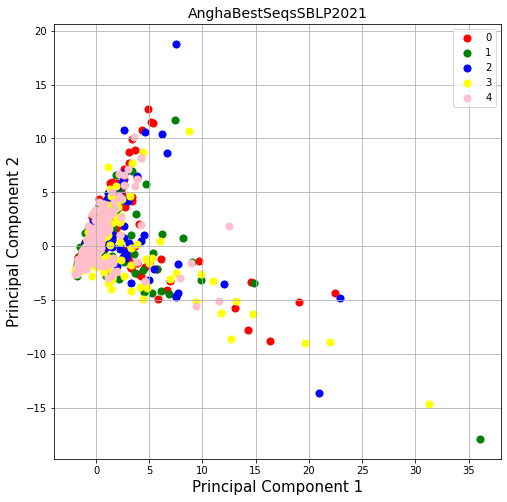

In [6]:
perform_experiment_pca(df, title="AnghaBestSeqsSBLP2021")

## AnghaLoops

In [7]:
filename = "AnghaLoops.csv"
df = pd.read_csv(filename)
df.tail()

,Unnamed: 0,name,class,0,1,2,3,4,5,6,...,55,56,57,58,59,60,61,62,63,64
7077,7077,extr_.hashcatsrchashcat.c_outer_loop,6,1.0,122.0,0.0,0.0,0.0,0.0,0.0,...,61.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0
7078,7078,extr_.linuxdrivershwmonit87.c_it87_update_device,6,1.0,44.0,0.0,0.0,0.0,0.0,0.0,...,21.0,0.0,0.0,1.0,0.0,40.0,0.0,0.0,0.0,0.0
7079,7079,extr_.linuxdriversscsilpfclpfc_sli.c_lpfc_sli4...,6,1.0,76.0,0.0,0.0,0.0,0.0,0.0,...,37.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0
7080,7080,extr_.FFmpeglibavcodecmlpdec.c_read_decoding_p...,6,1.0,58.0,0.0,0.0,0.0,0.0,0.0,...,26.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
7081,7081,extr_.linuxfsreiserfsjournal.c_journal_read_tr...,6,1.0,46.0,0.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,0.0,0.0,101.0,0.0,0.0,0.0,0.0


Shape of samples: (7082, 65)
Shape of targets: (7082, 1)
Explained variance: [5.65326953 3.43221406]
Explained variance ratio (by component): [0.12846526 0.07799385]
Explained variance ratio (sum): 0.206%


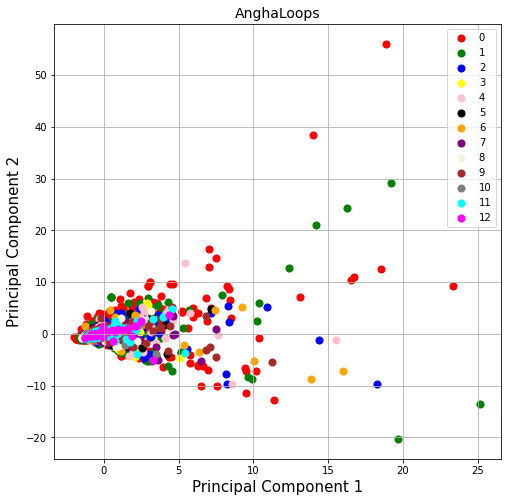

In [8]:
perform_experiment_pca(df, title="AnghaLoops")

## CodeNetBestSeqsSBLP2021_merge_classes

In [9]:
filename = "CodeNetBestSeqsSBLP2021_merge_classes.csv"
df = pd.read_csv(filename)
df.tail()

,Unnamed: 0,name,class,0,1,2,3,4,5,6,...,55,56,57,58,59,60,61,62,63,64
2495,2495,p02891_s026788939,2,196.0,195.0,0.0,0.0,34.0,0.0,6.0,...,57.0,0.0,5.0,2.0,0.0,388.0,0.0,24.0,0.0,0.0
2496,2496,p03803_s164708696,2,356.0,311.0,0.0,0.0,52.0,0.0,14.0,...,97.0,2.0,11.0,0.0,0.0,674.0,0.0,41.0,0.0,0.0
2497,2497,p03408_s003650092,2,97.0,80.0,0.0,0.0,27.0,0.0,3.0,...,19.0,0.0,3.0,0.0,0.0,206.0,0.0,15.0,0.0,0.0
2498,2498,p03280_s131740813,2,203.0,229.0,0.0,0.0,20.0,0.0,3.0,...,69.0,0.0,10.0,0.0,0.0,619.0,0.0,17.0,0.0,0.0
2499,2499,p02917_s054629196,2,3.0,11.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0


Shape of samples: (2500, 65)
Shape of targets: (2500, 1)
Explained variance: [21.3468363   4.13671677]
Explained variance ratio (by component): [0.43547546 0.08438902]
Explained variance ratio (sum): 0.520%


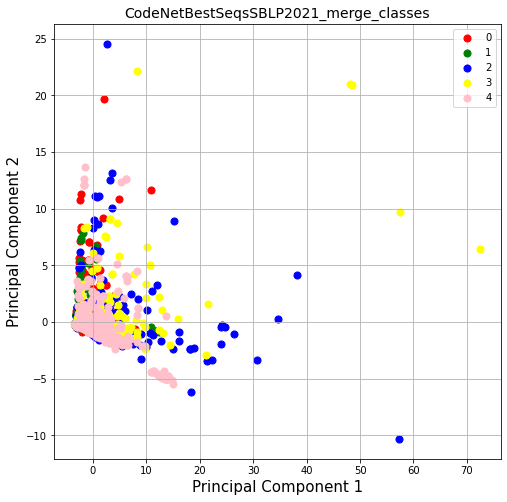

In [10]:
perform_experiment_pca(df, title="CodeNetBestSeqsSBLP2021_merge_classes")

## CodeNetBestSeqsSBLP2021

In [11]:
filename = "CodeNetBestSeqsSBLP2021.csv"
df = pd.read_csv(filename)
df.tail()

,Unnamed: 0,name,class,0,1,2,3,4,5,6,...,55,56,57,58,59,60,61,62,63,64
2495,2495,s574501869,2,84.0,55.0,0.0,0.0,18.0,0.0,2.0,...,16.0,0.0,2.0,0.0,0.0,150.0,0.0,9.0,0.0,0.0
2496,2496,s672355252,2,82.0,39.0,0.0,0.0,9.0,0.0,1.0,...,12.0,0.0,2.0,0.0,0.0,145.0,0.0,9.0,0.0,0.0
2497,2497,s369411689,2,83.0,48.0,0.0,0.0,16.0,0.0,2.0,...,14.0,0.0,2.0,0.0,0.0,149.0,0.0,9.0,0.0,0.0
2498,2498,s138181654,2,85.0,40.0,0.0,0.0,15.0,0.0,2.0,...,12.0,0.0,2.0,0.0,0.0,143.0,0.0,9.0,0.0,0.0
2499,2499,s525082001,2,59.0,113.0,0.0,0.0,0.0,0.0,0.0,...,29.0,0.0,3.0,0.0,0.0,132.0,0.0,0.0,0.0,0.0


Shape of samples: (2500, 65)
Shape of targets: (2500, 1)
Explained variance: [12.82718345  7.50291959]
Explained variance ratio (by component): [0.27874027 0.1630417 ]
Explained variance ratio (sum): 0.442%


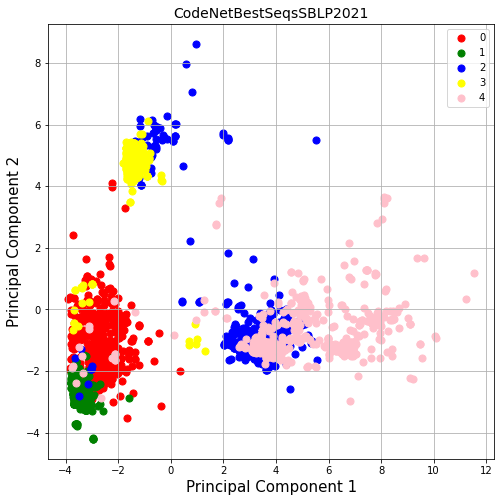

In [12]:
perform_experiment_pca(df, title="CodeNetBestSeqsSBLP2021")

## PCA With POJ-5

In [13]:
filename = "POJ-5.csv"
df = pd.read_csv(filename)
df.tail()

,Unnamed: 0,name,class,0,1,2,3,4,5,6,...,55,56,57,58,59,60,61,62,63,64
2495,2495,738,2,1.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2496,2496,568,2,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,13.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
2497,2497,742,2,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,12.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
2498,2498,455,2,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,12.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
2499,2499,63,2,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,8.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0


Shape of samples: (2500, 65)
Shape of targets: (2500, 1)
Explained variance: [5.35103329 4.80552833]
Explained variance ratio (by component): [0.14456467 0.12982719]
Explained variance ratio (sum): 0.274%


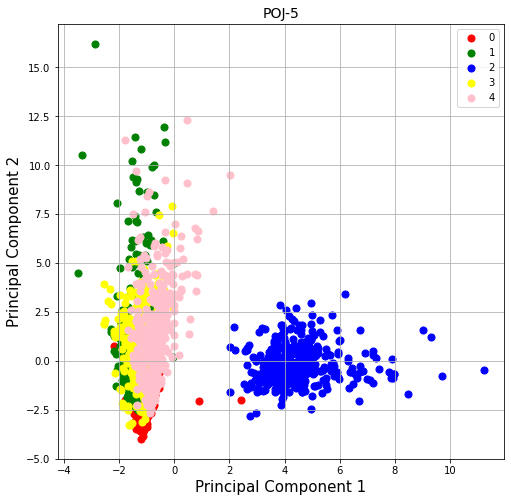

In [14]:
perform_experiment_pca(df, title="POJ-5")

## POJBestSeqsSBLP2021_merge_2classes

In [15]:
filename = "POJBestSeqsSBLP2021_merge_2classes.csv"
df = pd.read_csv(filename)
df.tail()

,Unnamed: 0,name,class,0,1,2,3,4,5,6,...,55,56,57,58,59,60,61,62,63,64
1495,1495,38_1810,2,1.0,20.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1496,1496,38_1421,2,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1497,1497,54_1233,2,3.0,29.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
1498,1498,38_1978,2,2.0,20.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
1499,1499,38_1685,2,1.0,46.0,0.0,0.0,0.0,0.0,0.0,...,24.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0


Shape of samples: (1500, 65)
Shape of targets: (1500, 1)
Explained variance: [5.56502793 4.36004701]
Explained variance ratio (by component): [0.1356419  0.10627171]
Explained variance ratio (sum): 0.242%


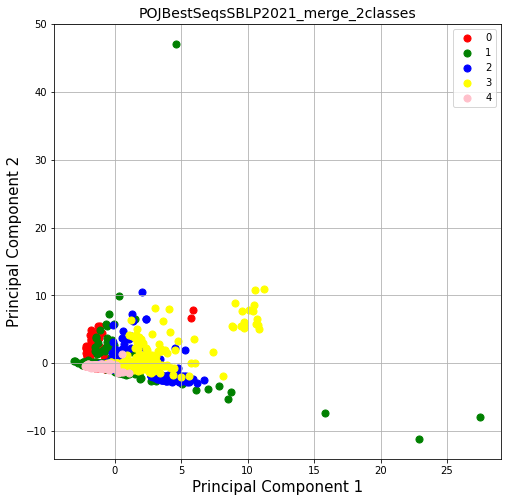

In [16]:
perform_experiment_pca(df, title="POJBestSeqsSBLP2021_merge_2classes")

## POJBestSeqsSBLP2021_merge_Nclasses

In [17]:
filename = "POJBestSeqsSBLP2021_merge_Nclasses.csv"
df = pd.read_csv(filename)
df.tail()

,Unnamed: 0,name,class,0,1,2,3,4,5,6,...,55,56,57,58,59,60,61,62,63,64
1820,1820,36_1555,2,3.0,19.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
1821,1821,85_205,2,1.0,15.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1822,1822,85_1572,2,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
1823,1823,24_359,2,4.0,20.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
1824,1824,27_1318,2,1.0,13.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


Shape of samples: (1825, 65)
Shape of targets: (1825, 1)
Explained variance: [5.22410949 4.6720401 ]
Explained variance ratio (by component): [0.13387813 0.11973026]
Explained variance ratio (sum): 0.254%


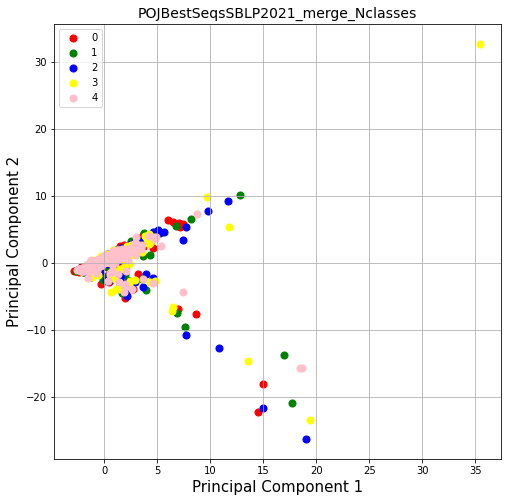

In [18]:
perform_experiment_pca(df, title="POJBestSeqsSBLP2021_merge_Nclasses")